In [86]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import io
import requests
import plotly as px
import matplotlib.pyplot as plt
import seaborn as sns 
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings('ignore')

In [114]:
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

In [88]:
df = pd.read_csv('Auto_Insurance_Claims_amount.csv')

In [89]:
df.head(3)

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,US,KS,Kansas,276.351928,No,Basic,Bachelor,2/24/11,Employed,...,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,US,NE,Nebraska,697.953590,No,Extended,Bachelor,1/31/11,Unemployed,...,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,US,OK,Oklahoma,1288.743165,No,Premium,Bachelor,2/19/11,Employed,...,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 26 columns):
Customer                         9134 non-null object
Country                          9134 non-null object
State Code                       9134 non-null object
State                            9134 non-null object
Claim Amount                     9134 non-null float64
Response                         9134 non-null object
Coverage                         9134 non-null object
Education                        9134 non-null object
Effective To Date                9134 non-null object
EmploymentStatus                 9134 non-null object
Gender                           9134 non-null object
Income                           9134 non-null int64
Location Code                    9134 non-null object
Marital Status                   9134 non-null object
Monthly Premium Auto             9134 non-null int64
Months Since Last Claim          9134 non-null int64
Months Since Policy Inception  

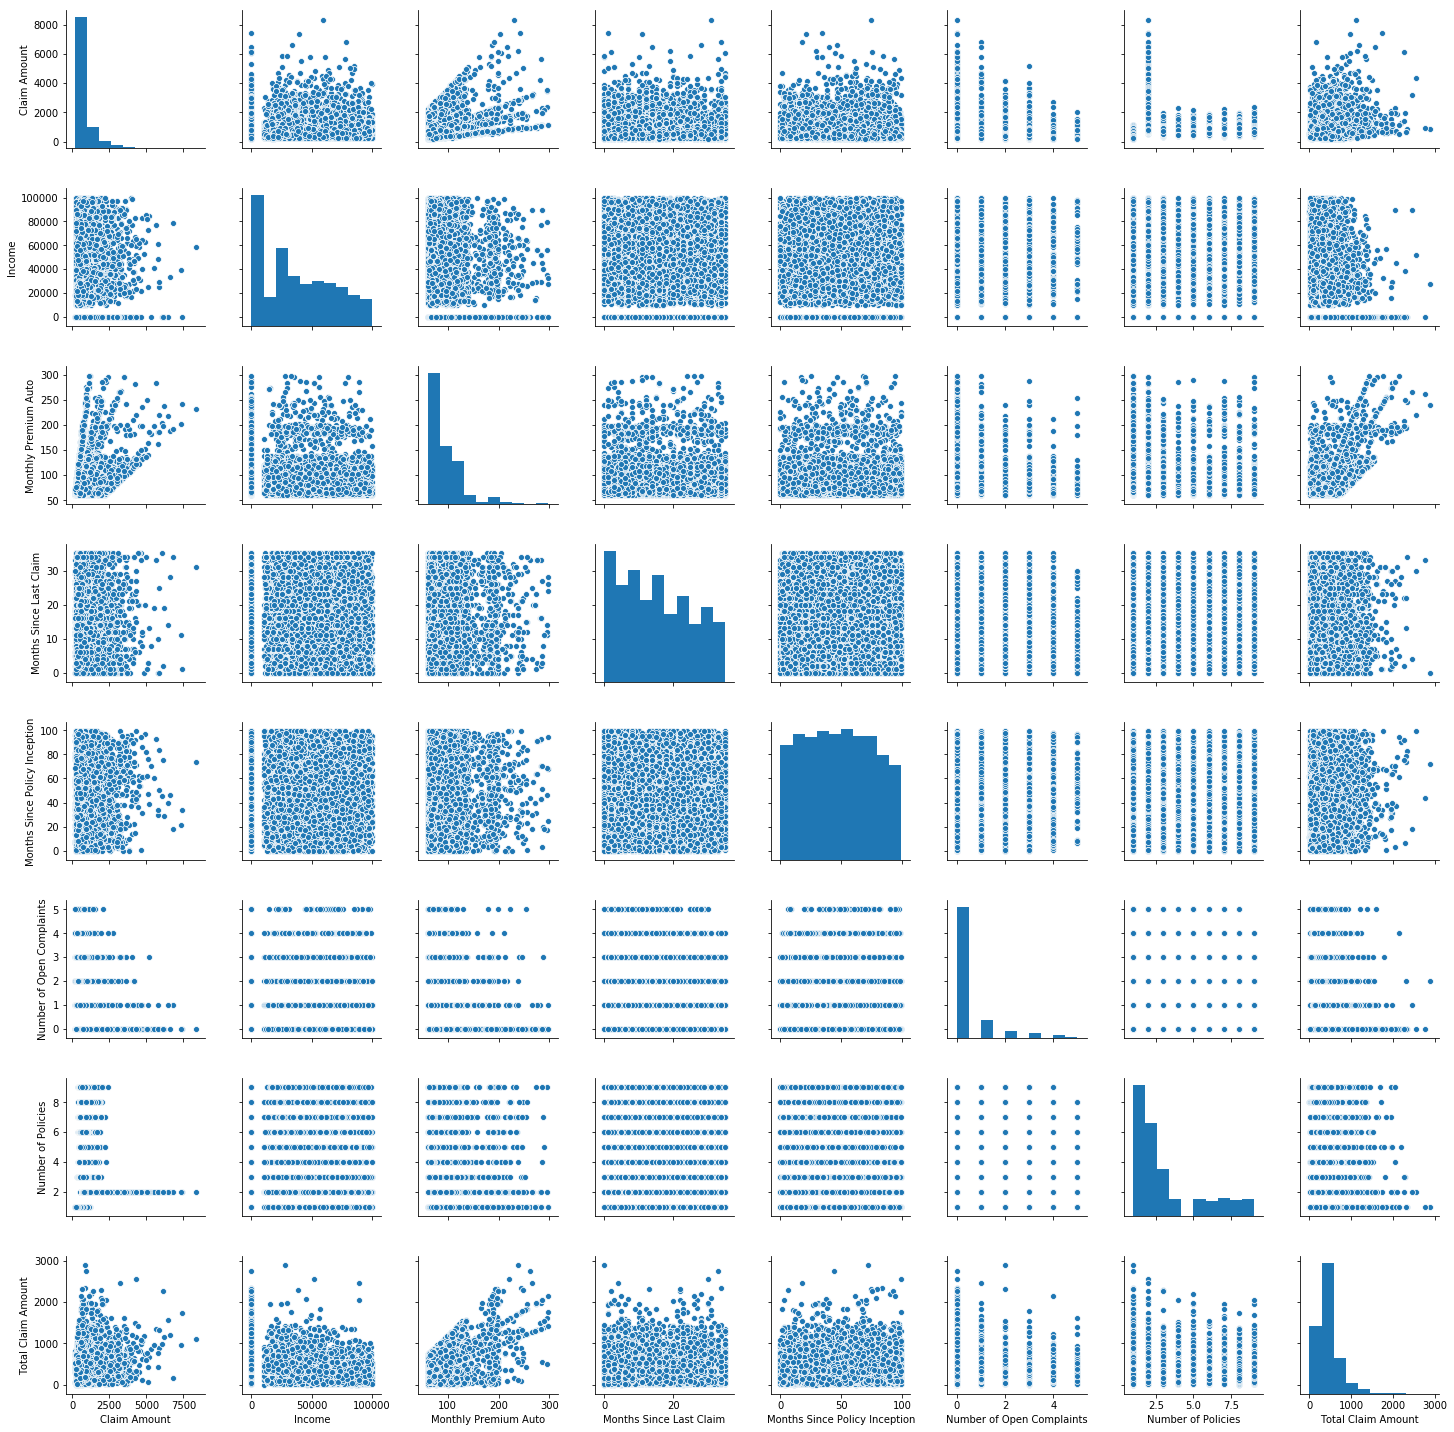

In [6]:
sns.pairplot(df)

In [7]:
df.isnull().sum()

Customer                         0
Country                          0
State Code                       0
State                            0
Claim Amount                     0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Claim Reason                     0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

# Summaery Statstic


In [8]:
df.describe()

,Claim Amount,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,800.494047,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,687.096761,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,189.800768,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,399.425179,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,578.018220,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,896.216704,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,8332.538119,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


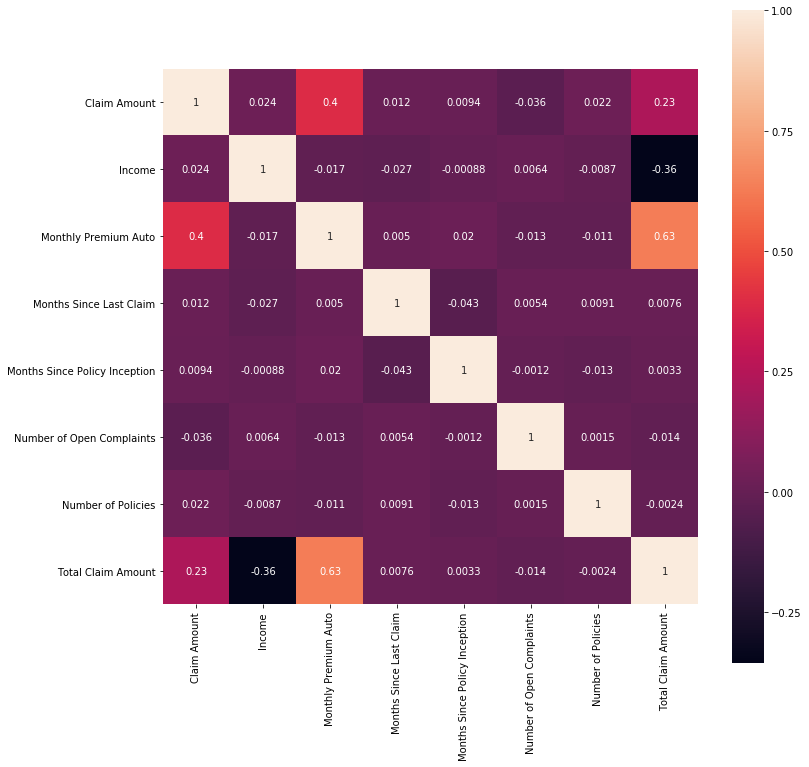

In [9]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corrmat, annot=True,square=True)

Text(0, 0.5, 'count')

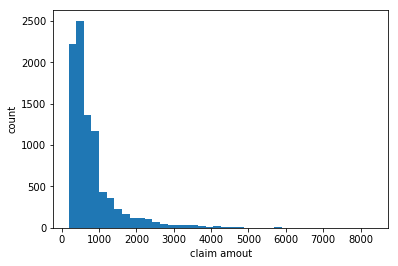

In [10]:
plt.hist(df['Claim Amount'],bins=40)
plt.xlabel('claim amout' )
plt.ylabel('count')

AxesSubplot(0.125,0.125;0.775x0.755)


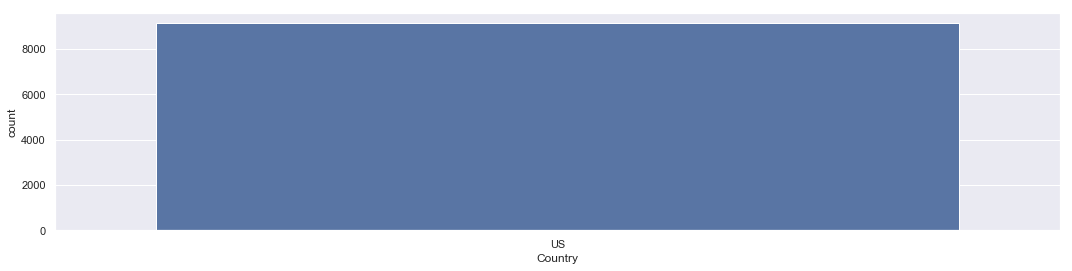

In [11]:
plt.figure(figsize=(18,4))
sns.set()
print(sns.countplot(df['Country']))


AxesSubplot(0.125,0.125;0.775x0.755)


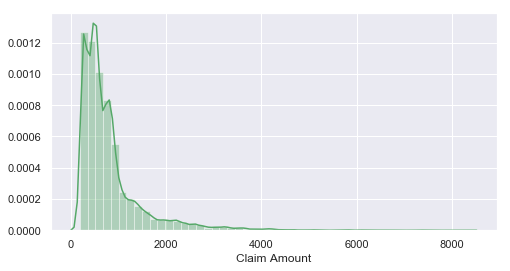

In [12]:
plt.figure(figsize=(8,4))
print(sns.distplot(df['Claim Amount'],color='g'))

AxesSubplot(0.125,0.125;0.775x0.755)


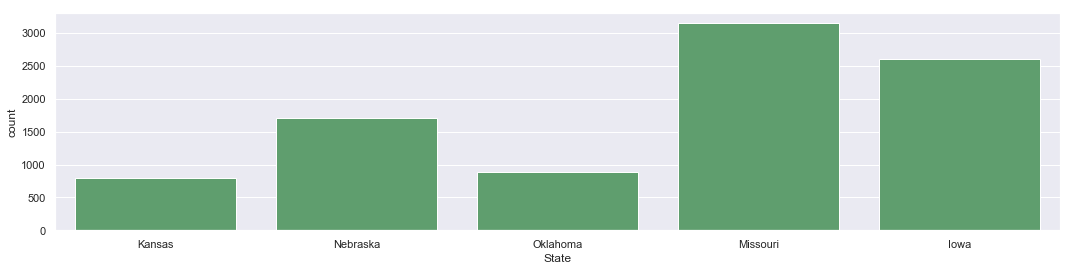

In [13]:
plt.figure(figsize=(18,4))
print(sns.countplot(df['State'],color='g'))

In [14]:
df['State Code'].value_counts()

MO    3150
IA    2601
NE    1703
OK     882
KS     798
Name: State Code, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


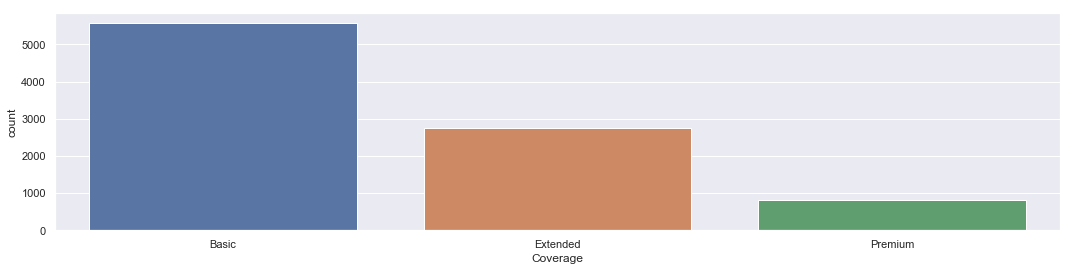

In [15]:
plt.figure(figsize=(18,4))
sns.set()
print(sns.countplot(df['Coverage']))


AxesSubplot(0.125,0.125;0.775x0.755)


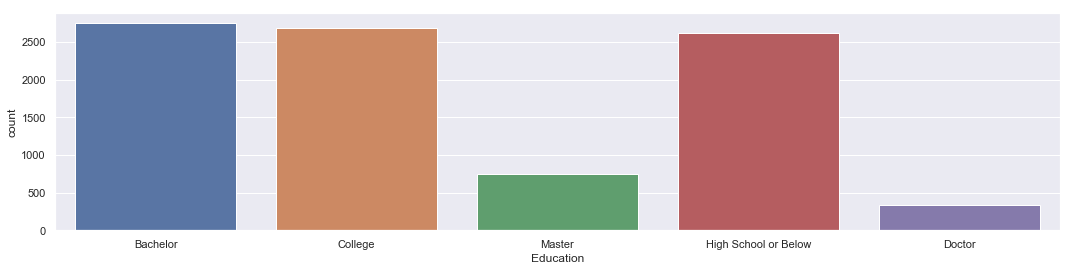

In [16]:
plt.figure(figsize=(18,4))
sns.set()
print(sns.countplot(df['Education']))


AxesSubplot(0.125,0.125;0.775x0.755)


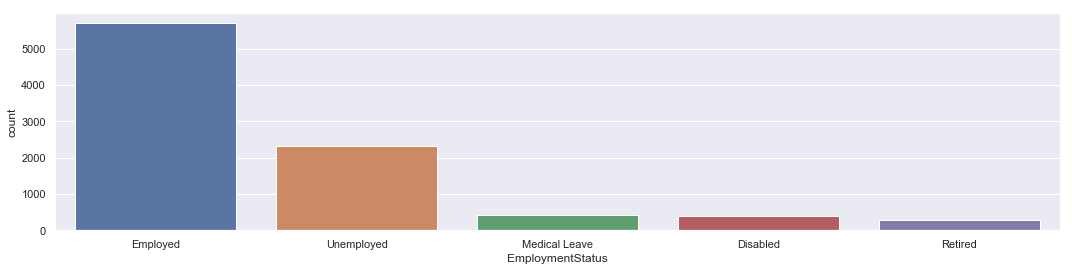

In [17]:
plt.figure(figsize=(18,4))
sns.set()
print(sns.countplot(df['EmploymentStatus']))


AxesSubplot(0.125,0.125;0.775x0.755)


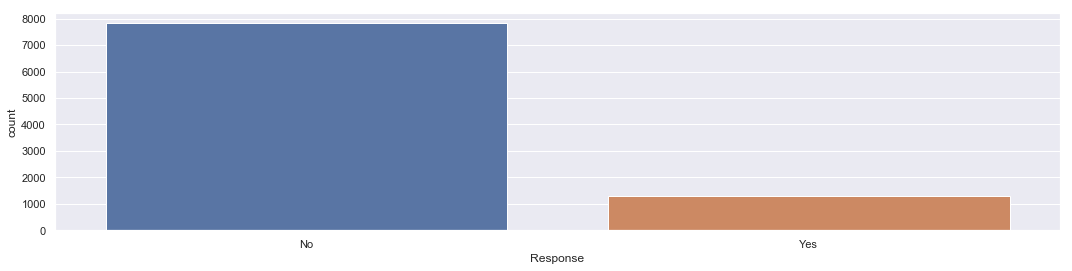

In [18]:
plt.figure(figsize=(18,4))
sns.set()
print(sns.countplot(df['Response']))


AxesSubplot(0.125,0.125;0.775x0.755)


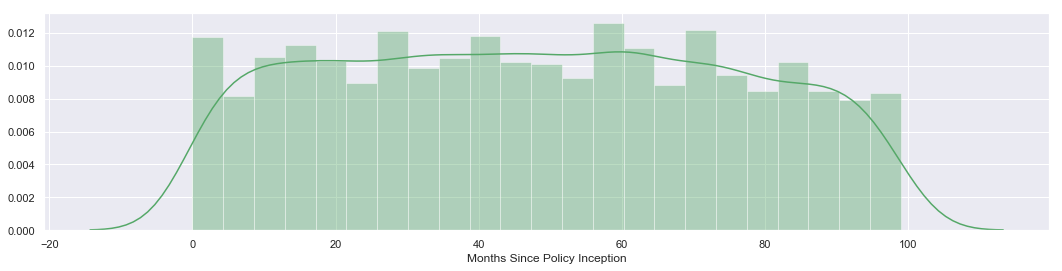

In [19]:
plt.figure(figsize=(18,4))
print(sns.distplot(df['Months Since Policy Inception'],color='g'))

AxesSubplot(0.125,0.125;0.775x0.755)


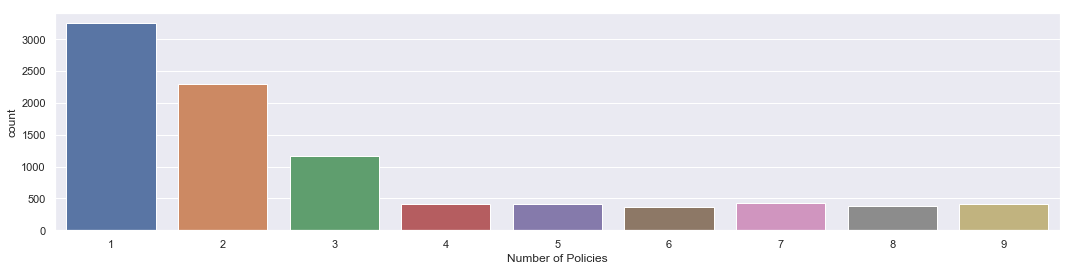

In [20]:
plt.figure(figsize=(18,4))
sns.set()
print(sns.countplot(df['Number of Policies']))


AxesSubplot(0.125,0.125;0.775x0.755)


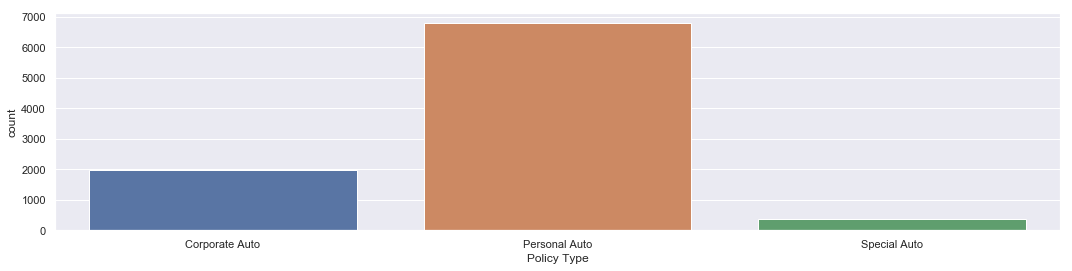

In [21]:
plt.figure(figsize=(18,4))
sns.set()
print(sns.countplot(df['Policy Type']))

AxesSubplot(0.125,0.125;0.775x0.755)


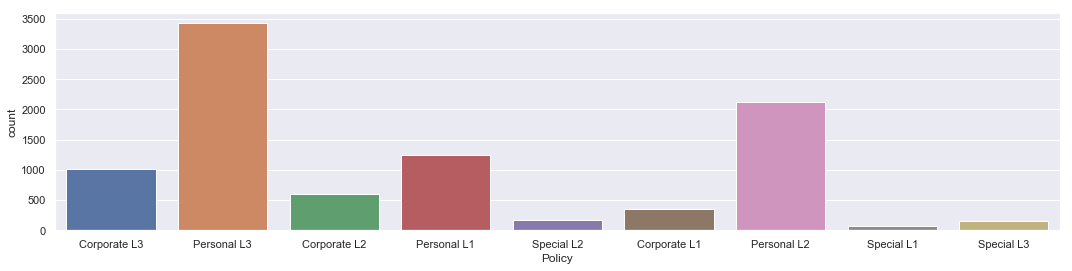

In [22]:
plt.figure(figsize=(18,4))
sns.set()
print(sns.countplot(df['Policy']))


AxesSubplot(0.125,0.125;0.775x0.755)


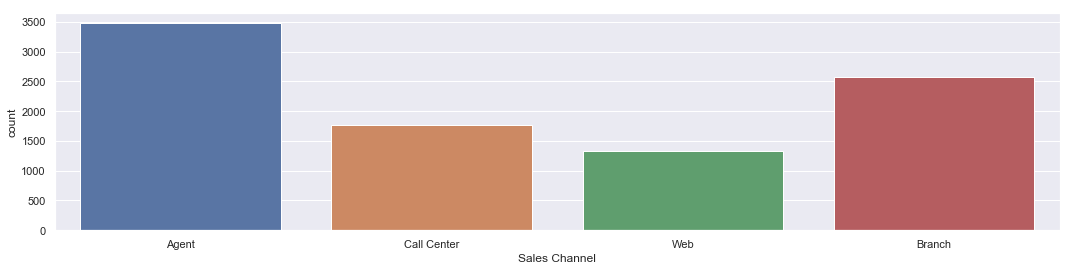

In [23]:
plt.figure(figsize=(18,4))
sns.set()
print(sns.countplot(df['Sales Channel']))


AxesSubplot(0.125,0.125;0.775x0.755)


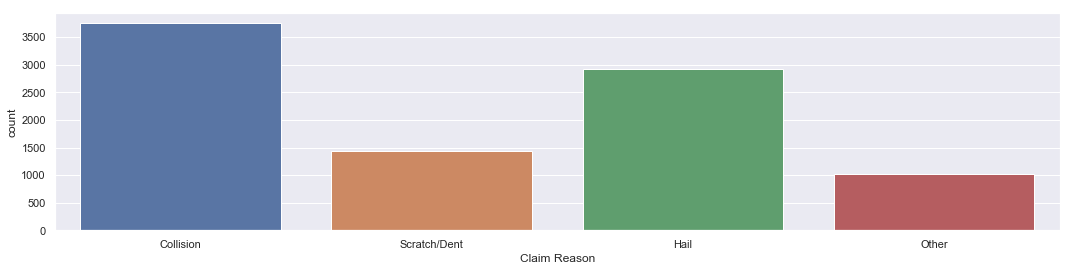

In [24]:
plt.figure(figsize=(18,4))
sns.set()
print(sns.countplot(df['Claim Reason']))


AxesSubplot(0.125,0.125;0.775x0.755)


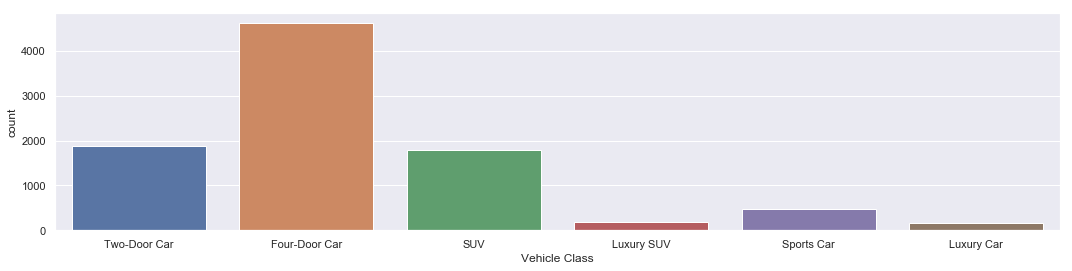

In [25]:
plt.figure(figsize=(18,4))
sns.set()
print(sns.countplot(df['Vehicle Class']))

AxesSubplot(0.125,0.125;0.775x0.755)


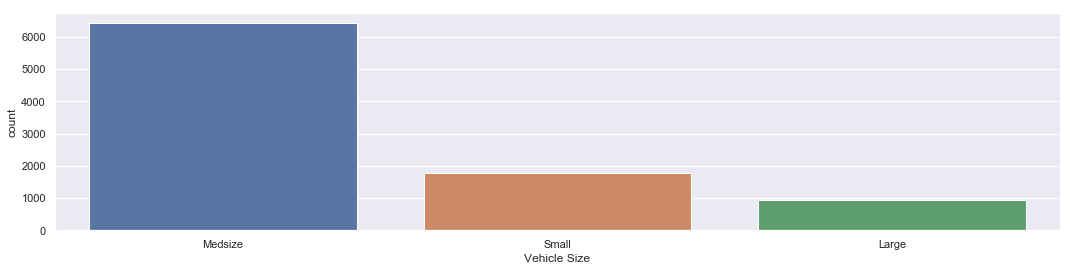

In [26]:


plt.figure(figsize=(18,4))
sns.set()
print(sns.countplot(df['Vehicle Size']))

AxesSubplot(0.125,0.125;0.775x0.755)


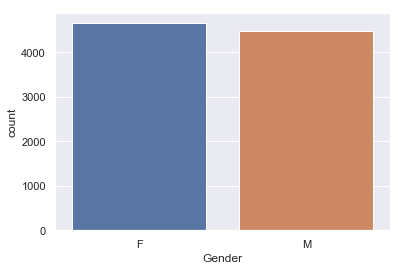

In [27]:
print(sns.countplot(df['Gender']))

Text(0, 0.5, 'count')

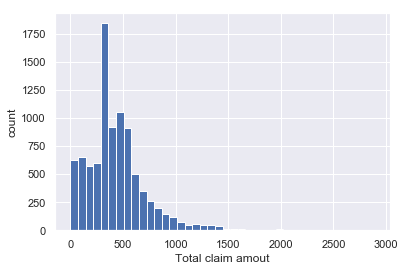

In [28]:
plt.hist(df['Total Claim Amount'],bins=40)
plt.xlabel('Total claim amout' )
plt.ylabel('count')

{'bodies': [<matplotlib.collections.PolyCollection at 0x1e5d993a860>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1e5d993a9b0>,
 'cmins': <matplotlib.collections.LineCollection at 0x1e5d3d4a710>,
 'cbars': <matplotlib.collections.LineCollection at 0x1e5d97fbba8>}

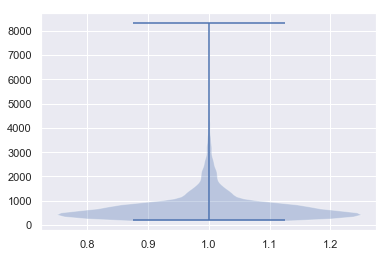

In [29]:
x=df['Claim Amount']
y=df['State']
plt.violinplot(df['Claim Amount'])

<Figure size 720x720 with 0 Axes>

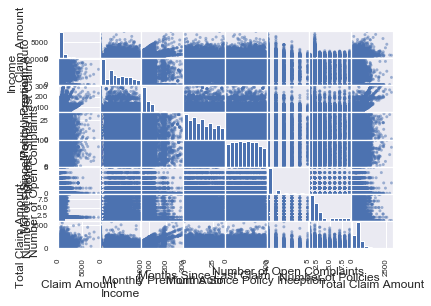

In [30]:
plt.figure(figsize=(10, 10))
scatter_matrix(df)
plt.show()

In [31]:
df['State Code']

0       KS
1       NE
2       OK
3       MO
4       KS
5       IA
6       IA
7       NE
8       IA
9       IA
10      MO
11      MO
12      MO
13      NE
14      MO
15      IA
16      OK
17      MO
18      IA
19      MO
20      IA
21      KS
22      NE
23      OK
24      MO
25      IA
26      MO
27      KS
28      NE
29      IA
        ..
9104    MO
9105    MO
9106    MO
9107    MO
9108    MO
9109    MO
9110    MO
9111    MO
9112    MO
9113    MO
9114    MO
9115    MO
9116    MO
9117    MO
9118    MO
9119    MO
9120    MO
9121    MO
9122    MO
9123    MO
9124    MO
9125    MO
9126    MO
9127    MO
9128    MO
9129    MO
9130    MO
9131    MO
9132    MO
9133    MO
Name: State Code, Length: 9134, dtype: object

In [32]:
df['Vehicle Class'].value_counts()

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: Vehicle Class, dtype: int64

In [91]:
dict = {'Collision' : 1, 'Hail' : 2, 'Scratch/Dent' : 3, 'Other' : 4}
df.replace({'Claim Reason':dict})
df['Claim Reason'] = pd.to_numeric(df['Claim Reason'],errors='coerce')


In [92]:
dict = {'Bachelor' : 1, 'College' : 2, 'High School or Below' : 3, 'Doctor':5,'Master' : 4}
df.replace({'Education':dict})
df['Education'] = pd.to_numeric(df['Education'],errors='coerce')
dict = {'Agent' : 1, 'Branch' : 2, 'Call Centre' : 3, 'Web' : 4}
df.replace({'Sales Channel':dict})
df['Sales Channel'] = pd.to_numeric(df['Sales Channel'],errors='coerce')
dict = {'Four-Door Car' : 1, 'Two-Door Car' : 2, 'SUV' : 3, 'Luxury Car':5,'Sports Car':6,'Luxury SUV' : 4}
df.replace({'Vehicle Class':dict})
df['Vehicle Class'] = pd.to_numeric(df['Vehicle Class'],errors='coerce')

In [93]:
df.dtypes

Customer                          object
Country                           object
State Code                        object
State                             object
Claim Amount                     float64
Response                          object
Coverage                          object
Education                        float64
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Claim Reason                     float64
Sales Channel                    float64
Total Claim Amount               float64
Vehicle Class   

In [94]:
df.shape

(9134, 26)

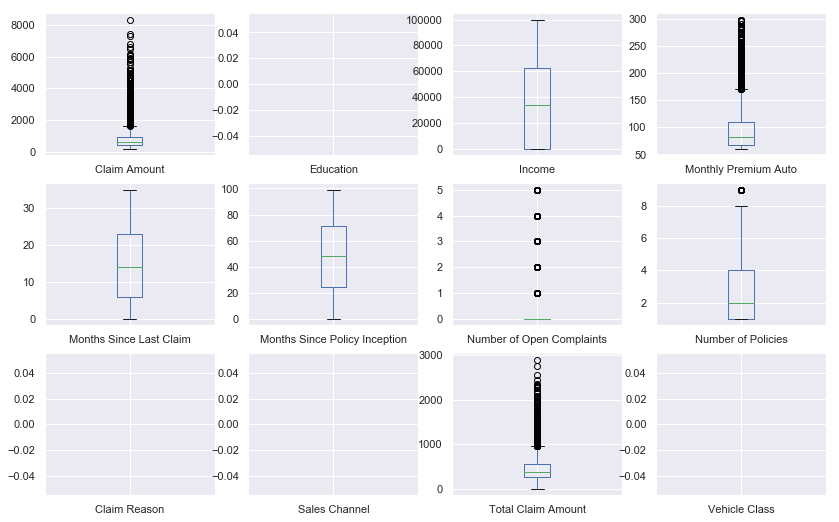

In [95]:
df.plot(kind='box', subplots=True , layout=(4,4))
plt.show()

In [96]:
df.head(2)

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,US,KS,Kansas,276.351928,No,Basic,NaN,2/24/11,Employed,...,5,0,1,Corporate Auto,Corporate L3,NaN,NaN,384.811147,NaN,Medsize
1,QZ44356,US,NE,Nebraska,697.953590,No,Extended,NaN,1/31/11,Unemployed,...,42,0,8,Personal Auto,Personal L3,NaN,NaN,1131.464935,NaN,Medsize


In [97]:
from sklearn.linear_model import LinearRegression

In [98]:
df1= list(df.select_dtypes(include=['object']).columns)
label_encoder_feat = {}
for i, feature in enumerate(df1):
    label_encoder_feat[feature] = LabelEncoder()
    df[feature] = label_encoder_feat[feature].fit_transform(df[feature])

df.head()

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,600,0,1,1,276.351928,0,0,NaN,47,1,...,5,0,1,0,2,NaN,NaN,384.811147,NaN,1
1,5946,0,3,3,697.953590,0,1,NaN,24,4,...,42,0,8,1,5,NaN,NaN,1131.464935,NaN,1
2,96,0,4,4,1288.743165,0,2,NaN,41,1,...,38,0,2,1,5,NaN,NaN,566.472247,NaN,1
3,8016,0,2,2,764.586183,0,0,NaN,12,4,...,65,0,7,0,1,NaN,NaN,529.881344,NaN,1
4,2488,0,1,1,281.369258,0,0,NaN,52,1,...,44,0,1,1,3,NaN,NaN,138.130879,NaN,1


In [99]:
df=df.drop(['Education','Claim Reason','Sales Channel','Vehicle Class'], axis = 1)

In [100]:
Y=df['Claim Amount']
X=df.drop(['Claim Amount'],axis=1)
#array=df.values
#X = array[:,1:]
#Y = array[:,0]

In [101]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.50430908,        nan, 0.55068994, ..., 1.11949664, 0.16963969,
        0.16668206],
       [0.52318023,        nan, 0.97332215, ..., 0.7486263 , 2.400737  ,
        0.16668206],
       [1.69545285,        nan, 1.73532819, ..., 0.7486263 , 0.45573376,
        0.16668206],
       ...,
       [0.80458634,        nan, 0.21131611, ..., 1.74220428, 1.22793667,
        0.16668206],
       [1.00407369,        nan, 0.21131611, ..., 0.12591866, 0.88511256,
        2.0278971 ],
       [1.46676298,        nan, 0.21131611, ..., 1.11949664, 0.22200449,
        0.16668206]])

In [102]:
threshold=3
print(np.where(z>3))
df_new=df[(z>3).all(axis=1)]

(array([  31,   50,   51,   79,   86,  125,  181,  185,  196,  196,  232,
        243,  244,  248,  248,  266,  274,  281,  292,  303,  315,  316,
        373,  375,  385,  386,  403,  404,  404,  407,  408,  418,  425,
        435,  444,  496,  496,  510,  512,  522,  522,  541,  541,  554,
        581,  581,  626,  633,  645,  680,  681,  702,  727,  749,  755,
        757,  810,  814,  817,  820,  832,  832,  832,  836,  840,  856,
        869,  873,  888,  888,  899,  914,  926,  944,  949, 1002, 1008,
       1011, 1046, 1046, 1058, 1071, 1078, 1078, 1109, 1113, 1120, 1133,
       1158, 1174, 1179, 1184, 1200, 1212, 1233, 1240, 1283, 1292, 1292,
       1300, 1305, 1312, 1312, 1319, 1330, 1364, 1382, 1383, 1383, 1384,
       1392, 1393, 1408, 1421, 1429, 1436, 1466, 1504, 1506, 1516, 1516,
       1521, 1529, 1534, 1541, 1552, 1552, 1555, 1558, 1592, 1626, 1640,
       1657, 1687, 1795, 1796, 1796, 1809, 1812, 1819, 1819, 1823, 1824,
       1850, 1858, 1858, 1859, 1861, 1881, 1881, 1

In [103]:
lm=LinearRegression()

In [104]:
lm.fit(X,Y)

LinearRegression()

In [105]:
lm.score(X,Y)

0.16339766157432822

In [106]:
lm.coef_

array([-7.64365349e-03, -4.08145286e-11, -1.01641952e+00, -1.01641952e+00,
       -2.82320796e+01, -1.89716525e+01, -6.65450717e-01, -9.62629130e+00,
       -1.72977679e+01,  9.03890279e-05,  1.20467523e+01, -2.30331465e+01,
        8.41386332e+00,  7.74596108e-01,  3.81210045e-02, -2.42107645e+01,
        7.69408938e+00,  4.28838592e+01, -4.33080529e+00, -6.10370685e-02,
        1.81025379e+01])

In [107]:
lm.intercept_

84.1893803081922

In [108]:
hr=np.array(50)

In [109]:
h=hr.reshape(-1,1)


# XGBoost


In [110]:
df1= list(df.select_dtypes(include=['object']).columns)
label_encoder_feat = {}
for i, feature in enumerate(df1):
    label_encoder_feat[feature] = LabelEncoder()
    df[feature] = label_encoder_feat[feature].fit_transform(df[feature])

df.head()

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Effective To Date,EmploymentStatus,Gender,...,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Total Claim Amount,Vehicle Size
0,600,0,1,1,276.351928,0,0,47,1,0,...,1,69,32,5,0,1,0,2,384.811147,1
1,5946,0,3,3,697.953590,0,1,24,4,0,...,2,94,13,42,0,8,1,5,1131.464935,1
2,96,0,4,4,1288.743165,0,2,41,1,0,...,1,108,18,38,0,2,1,5,566.472247,1
3,8016,0,2,2,764.586183,0,0,12,4,1,...,1,106,18,65,0,7,0,1,529.881344,1
4,2488,0,1,1,281.369258,0,0,52,1,1,...,2,73,12,44,0,1,1,3,138.130879,1


In [111]:
from sklearn.utils import shuffle
df = shuffle(df)

# Splitting the data set into train and test set
from sklearn.model_selection import train_test_split

X = df.drop(columns = ['Claim Amount'])
Y = df['Claim Amount']

In [116]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3,random_state = 0)
print ("Train data set size : ", X_train.shape)
print ("Test data set size : ", X_test.shape)

Train data set size :  (6393, 21)
Test data set size :  (2741, 21)


In [118]:
tree = DecisionTreeRegressor()
tree.fit(X_train,Y_train)
y_pred = tree.predict(X_test)

In [119]:
importance = tree.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.03164
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00665
Feature: 3, Score: 0.00503
Feature: 4, Score: 0.00395
Feature: 5, Score: 0.01205
Feature: 6, Score: 0.03760
Feature: 7, Score: 0.00392
Feature: 8, Score: 0.00849
Feature: 9, Score: 0.03100
Feature: 10, Score: 0.00664
Feature: 11, Score: 0.00611
Feature: 12, Score: 0.23014
Feature: 13, Score: 0.04675
Feature: 14, Score: 0.02289
Feature: 15, Score: 0.00495
Feature: 16, Score: 0.47725
Feature: 17, Score: 0.00454
Feature: 18, Score: 0.01438
Feature: 19, Score: 0.04055
Feature: 20, Score: 0.00549


In [120]:
r2_score(Y_test,y_pred)

0.4249679908370899